In [1]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# 讀取圖檔
img = cv2.imread('lena.bmp')
img.shape

#https://www.brilliantcode.net/1821/numpy-notes-01-padding-in-convolutional-neural-network/


(512, 512, 3)

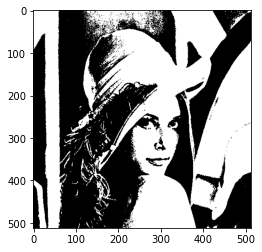

In [3]:
s = img.shape
bn = np.zeros(img.shape)
bnc = np.zeros(img.shape)
for i in range(s[2]):
    for j in range(s[0]):
        for k in range(s[1]):
            if img[j,k,i]>127:
                bn[j,k,i] = 255
                bnc[j,k,i] = 0
            else:
                bn[j,k,i] = 0
                bnc[j,k,i] = 255
plt.imshow(bn.astype('uint8'))
plt.show()

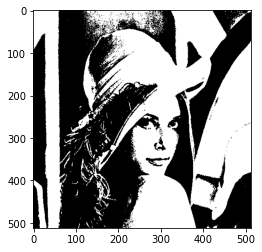

In [13]:
plt.imshow(-(bnc-255).astype('uint8'))
plt.show()

In [4]:
kernel = np.array([[0,255,255,255,0],[255,255,255,255,255],[255,255,255,255,255],[255,255,255,255,255],[0,255,255,255,0]])
#origin = (2,2)
#plt.imshow(filt.astype('uint8'))
#plt.show()
#max(kernel.shape)

In [5]:
def dilation(img,k): 
    img_pad = np.pad(array=img, pad_width=((3,3),(3,3),(0,0)), mode='constant', constant_values=255)
    img_tmp = np.zeros(img_pad.shape)
    for i in range(3,515): #3~514
        for j in range(3,515): #3~514
            if img_pad[i,j,0] != 0:
                for p in range(5):
                    for q in range(5):
                        if k[p,q] != 0:
                            img_tmp[i-2+p,j-2+q,0] = 255
                            img_tmp[i-2+p,j-2+q,1] = 255
                            img_tmp[i-2+p,j-2+q,2] = 255
    return img_tmp[3:515,3:515]
                            

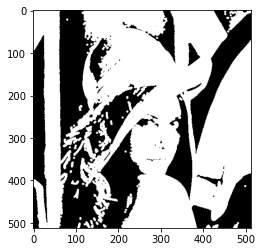

In [12]:
img_dil = dilation(bn,kernel)
plt.imshow(img_dil.astype('uint8'))
plt.show()
#print(img_dil)

In [6]:
def erotion(img,k): 
    img_pad = np.pad(array=img, pad_width=((3,3),(3,3),(0,0)), mode='constant', constant_values=255)
    img_tmp = np.zeros(img_pad.shape)
    num = np.count_nonzero(k == 255)
    for i in range(3,515): #3~514
        for j in range(3,515): #3~514
            c = 0
            for p in range(5):
                for q in range(5):
                    if k[p,q] != 0 and k[p,q] == img_pad[i-2+p,j-2+q,0]:
                        c+=1
            if c == num:
                img_tmp[i,j,0] = 255
                img_tmp[i,j,1] = 255
                img_tmp[i,j,2] = 255
    return img_tmp[3:515,3:515]

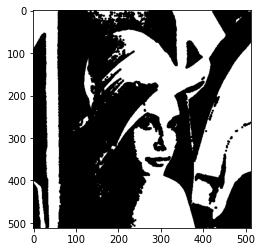

In [25]:
img_ero = erotion(bn,kernel)
plt.imshow(img_ero.astype('uint8'))
plt.show()

In [7]:
def opening(img,k):
    return dilation(erotion(img,k),k)

In [8]:
def closing(img,k):
    return erotion(dilation(img,k),k)

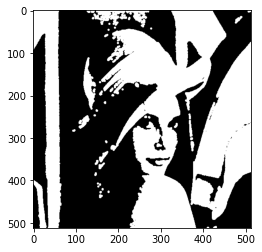

In [29]:
img_op = opening(bn,kernel)
plt.imshow(img_op.astype('uint8'))
plt.show()

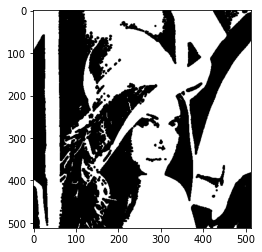

In [30]:
img_clo = closing(bn,kernel)
plt.imshow(img_clo.astype('uint8'))
plt.show()

In [18]:
def hit_and_miss_trans(img,k):
    img_c =  -(img-255)
    J = np.array([[0,0,0,0,0],[0,0,0,0,0],[0,255,255,0,0],[0,0,255,0,0],[0,0,0,0,0]])
    K = np.array([[0,0,0,0,0],[0,0,255,255,0],[0,0,0,255,0],[0,0,0,0,0],[0,0,0,0,0]])
    a_j = erotion(img,J)
    
    ac_k = erotion(img_c,K)
    
    return (a_j*ac_k/255).astype(int)

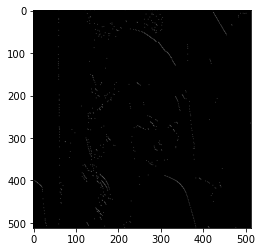

In [20]:
img_hnmt = hit_and_miss_trans(bn,kernel)
plt.imshow(img_hnmt.astype('uint8'))
plt.show()

In [21]:
np.count_nonzero(img_hnmt == 255)

2325

In [ ]:
aa = np.array(kernel)
bb = np.array(-(aa-255))
cc = aa
print(aa)
print(bb)

In [ ]:
(cc*aa/255).astype(int)

In [ ]:
a = np.array([kernel,kernel,kernel])
#print(a)
a_3d = np.pad(array=a, pad_width=((0,0),(3,3),(3,3)), mode='constant', constant_values=0)
print(a_3d)